# Coupled Cluster Calculations of Infinite Nuclear Matter in the Complete Basis Limit Using Bayesian Machine Learning
## Source Code

Date Created: August 17, 2024

Last Modified: August 30, 2024

## Imports

In [1]:
%%time
##############################
##          IMPORTS         ##
##############################
# THIRD PARTY IMPORTS
# For arrays
import numpy as np
# For importing the data set
import pandas as pd
# For graphing
import matplotlib.pyplot as plt
import glob
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessRegressor as GP

##############################
##        DIRECTORIES       ##
##############################
# Directories to find data files and save images
data_dir = 'raw_data/'
images_dir = 'img/'

##############################
##     SUPRESS WARNINGS     ##
##############################
# Supress warnings from SCikit-Learn. Warnings are recieved to lower the noise level on the white
# kernel but doing so leads to unstable results
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

CPU times: user 4.22 s, sys: 586 ms, total: 4.81 s
Wall time: 2.4 s


## Importing and Formatting Data

### CCD(T) PNM

In [2]:
ccdt_pert_pnm_data_dir = data_dir+"CCDT_Pert_PNM/"
ccdt_pert_pnm_data = []
files = glob.glob(ccdt_pert_pnm_data_dir+"*.csv")
files.sort()
for file in files:
    df = pd.read_csv(file)
    ccdt_pert_pnm_data.append(df.to_numpy())

### CCD(T) SNM

In [3]:
ccdt_pert_snm_data_dir = data_dir+"CCDT_Pert_SNM/"
ccdt_pert_snm_data = []
files = glob.glob(ccdt_pert_snm_data_dir+"*.csv")
files.sort()
for file in files:
    df = pd.read_csv(file)
    ccdt_pert_snm_data.append(df.to_numpy())

## Figure 1

In [4]:
##############################
##      GET STATES DICT     ##
##############################    
def get_states_dict ():
    """
    Inputs:
        None.
    Returns:
        states_dict (a dictionary): the conversion between shell number and number of 
            single particle states.
    Dictionary thats converts between number of shells to number of single particle states
    for the first 178 shells.  
    """
    states_dict = {
        1:2, 2:14, 3:38, 4:54, 5:66, 6:114, 7:162, 8:186, 9:246, 10:294, 
        11:342, 12:358, 13:406, 14:502, 15:514, 16:610, 17:682, 18:730, 
        19:778, 20:874, 21:922, 22:970, 23:1030, 24:1174, 25:1238, 26:1382, 
        27:1478, 28:1502,29:1598, 30:1694, 31:1790, 32:1850, 33:1898, 
        34:2042, 35:2090, 36:2282, 37:2378, 38:2426, 39:2474, 40:2618, 
        41:2714, 42:2730, 43:2838, 44:3006, 45:3102, 46:3150, 47:3294, 
        48:3486, 49:3582, 50:3678, 51:3726, 52:3870, 53:4014, 54:4206, 
        55:4218, 56:4410, 57:4602, 58:4650, 59:4746,  60:4938, 61:5034, 
        62:5106, 63:5202, 64:5442, 65:5554, 66:5602, 67:5794, 68:5890,
        69:5938, 70:6142, 71:6238, 72:6382, 73:6478, 74:6574, 75:6814,
        76:6862, 77:7150, 78:7390, 79:7486, 80:7582, 81:7774, 82:7822,
        83:7918, 84:8134, 85:8278, 86:8338, 87:8674, 88:8770, 89:8914,
        90:9106 ,91:9250, 92:9394, 93:9458, 94:9602, 95:9890, 96:10082,
        97:10274, 98:10370, 99:10514, 100:10754, 101:10898, 102:10994,
        103:11138, 104:11330, 105:11378, 106:11618, 107:11810, 108:11834,
        109:12074, 110:12122, 111:12266, 112:12362, 113:12458, 114:12698,
        115:12794, 116:12938, 117:13034, 118:13130, 119:13226, 120:13322,
        121:13418, 122:13466, 123:13610, 124:13802, 125:13818, 126:14058,
        127:14202, 128:14298, 129:14490, 130:14586, 131:14682, 132:14778,
        133:14970, 134:15042, 135:15090, 136:15186, 137:15378, 138:15522,
        139:15618, 140:15714, 141:15762, 142:15810, 143:15906, 144:16002,
        145:16050, 146:16098, 147:16146, 148:16242, 149:16386, 150:16482,
        151:16674, 152:16722, 153:16818, 154:16914, 155:16930, 156:17026,
        157:17122, 158:17218, 159:17338, 160:17386, 161:17434, 162:17530,
        163:17626, 164:17674, 165:17770, 166:17818, 167:17914, 168:17962,
        169:18010, 170:18058, 171:18154, 172:18202, 173:18218, 174:18314,
        175:18362, 176:18410, 177:18458, 178:18506}
        
    return states_dict

states_dict_pnm = get_states_dict()

### Left

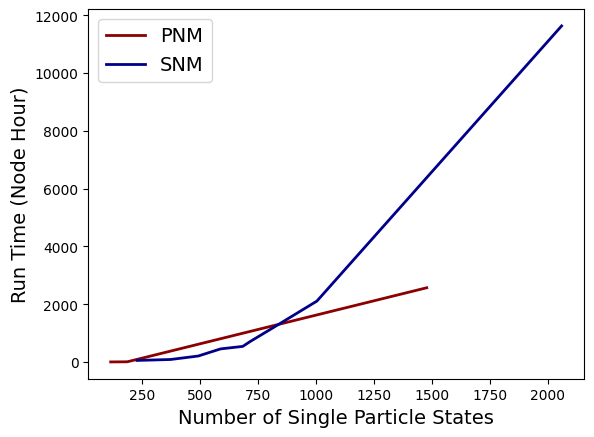

In [5]:
ccdt_pert_times = ccdt_pert_pnm_data[3][:,-1]
ccdt_pert_times_snm = ccdt_pert_snm_data[3][:,-1]
M_2 = [2*states_dict_pnm[i] for i in ccdt_pert_snm_data[3][:,0]]
M = [states_dict_pnm[i] for i in ccdt_pert_pnm_data[3][:,0]]
plt.plot(M, ccdt_pert_times, linewidth=2,color='darkred',label="PNM")
plt.plot(M_2, ccdt_pert_times_snm, linewidth=2, color='darkblue', label='SNM')
plt.xlabel("Number of Single Particle States", fontsize=14)
plt.ylabel("Run Time (Node Hour)", fontsize=14)
plt.legend(fontsize=14)
plt.savefig(images_dir+'prx_figure_1_a.png', dpi=1000)

### Right

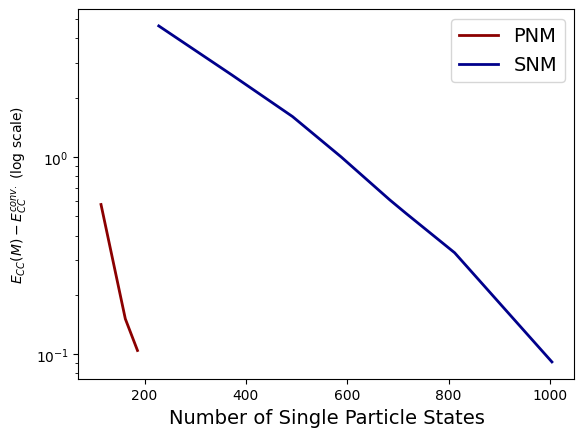

In [6]:
error_pnm = ccdt_pert_pnm_data[3][:,-2][:-1]-ccdt_pert_pnm_data[3][:,-2][-1]
error_snm = ccdt_pert_snm_data[3][:,-2][:-1]-ccdt_pert_snm_data[3][:,-2][-1]
plt.plot(M[:-1], error_pnm, linewidth=2, color='darkred', label='PNM')
plt.plot(M_2[:-1], error_snm, linewidth=2, color='darkblue', label='SNM')
plt.yscale('log')
plt.xlabel("Number of Single Particle States", fontsize=14)
plt.ylabel(r"$E_{CC}(M) - E_{CC}^{conv.}$ (log scale)")
plt.legend(fontsize=14)
plt.savefig(images_dir+"prx_figure_1_b.png", dpi=1000)

## Figure 2

In [7]:
##############################
##    SUBTRACTION ERROR    ##
##############################
def subtraction_error (A,B):
    errs = []
    for i in range(len(A)):
        err = np.sqrt(A[i]**2 + B[i]**2)
        errs.append(err)
    return errs

####################################
## RMSE (Root Mean Squared Error) ##
####################################  
def rmse(A,B):
    """
        Inputs:
            A,B (lists or NumPy arrays): the data.  A and B must be the same
                length.
        Returns:
            Unnamed (a float): the RMSE score between A and B
        Computes the RMSE score between two data sets.
    """
    assert len(A)==len(B)
    return np.sqrt(np.average((np.asarray(A)-np.asarray(B))**2))


##############################
##       PERCENT ERROR      ##
############################## 
def percent_error (prediction, truth):
    """
        Inputs:
            prediction (a float, list, or Numpy array): the predicted value(s)
            truth (a float, list, or NumPy array): the true value(s)
        Returns:
            Unnamed (a float): the percent error between the two inputs
        Computes the percent error between the given prediction and true values
    """
    prediction = np.asarray(prediction)
    truth = np.asarray(truth)
    return np.average(np.abs((prediction-truth)/truth))*100

##############################
##  FORMAT SEQUENTIAL DATA  ##
##############################
def format_sequential_data (y, seq=2):
    """
        Inputs:
            y (a list or NumPy array): the y values of a data set
            seq (an int): the length of the sequence.  Default value is 2
        Returns:
            inputs (a list): the inputs for a machine learning model using 
                sequential data formatting
            outputs (a list): the outputs for a machine learning model using
                sequential data formatting              
        Formats a given list or array in sequential formatting using the 
        given sequence lenght.  Default sequence length is two.

        Explanation of sequential formatting:
        Typically data points of the form (x,y) are used to train a machine
        learning model.  This teaches the model the relationship between the
        x data and the y data in the training range.  This model works well 
        for interpolation, but not so well for extrapolation.  A better data
        model for extrapolation would be one that learns the patterns in the y
        data to better guess what y value should come next.  Therefore, this 
        method formats the data in a sequential pattern so that the points are
        of the form ((y1, y2, ..., yn), yn+1) where n is the lenght of the 
        sequence (seq).
    """
    # Make sure seq is an int
    assert isinstance(seq, int)
    # Set up the input and output lists
    inputs = []
    outputs = []
    # Cycle through the whole y list/array and separate the points into 
    # sequential format
    for i in range(0, len(y)-seq):
        inputs.append(y[i:i+seq])
        outputs.append(y[i+seq])
    # Return the input and output lists.  NOTE: the data type of the return 
    # values is LIST
    return inputs, outputs  

####################################
## SEQUENTIAL EXTRAPOLATE SKLEARN ##
####################################
def sequential_extrapolate_sklearn (R, y_train, num_points, seq):
    """
        Inputs:
            R (an object): A trained Scikit-Learn regression model
            y_train (a list): the y component of the training data set, unformatted
            num_points (an int): the number of points to be in the extrapolated data set
            seq (an int): the SRE length of sequence that R was trained with
        Returns:
            y_test (a list): the extrapolated data set
            y_std (a list): the uncertainity on each point in the extrapoalted set
        Performs SRE using a trained Scikit-Learn regression model.
    """
    # Make sure inputs are of the proper type
    assert isinstance(num_points, int)
    assert isinstance(seq, int)

    # Add the training data to the extrapolated data set and no uncertainities for the
    # training data
    y_test = y_train.copy()
    y_std = np.zeros(len(y_train)).tolist()

    # Extrapolate until enough data points have been predicted
    while len(y_test) < num_points:
        next_test = y_test[-seq:]
        point,std = R.predict([next_test],return_std=True)
        y_test.append(point[0])
        y_std.append(std[0])

    # Return the predicted data set and uncertainities
    return y_test,y_std    

####################################
##     PERFORM EXTRAPOLATIONS     ##
####################################
def perform_extrapolations (data_sets,dim=4, start_dim=1, seq=1, n = 4,non_seq=False):
    results = []
    # For each data set
    for A in data_sets:
        # Separate the columns
        shells = A[:,0]
        particles = A[:,1]
        matter_type = A[:,2]
        density = A[:,3]
        reference_E = A[:,4]
        mbpt2_E = A[:,5]
        ccd_E = A[:,6]
        ccd_times = A[:,7]
        # Calculate the correlation energies (total not per particle)
        mbpt2_correlation_E = (mbpt2_E - reference_E)*particles[0]
        ccd_correlation_E = (ccd_E - reference_E)*particles[0]
        # Seperate the final values (the test data), and the training data
        final_cc = ccd_correlation_E[-1]
        final_mbpt =mbpt2_correlation_E[-1]
        cc_seq = ccd_correlation_E[start_dim:dim]
        mbpt_seq = mbpt2_correlation_E[start_dim:dim]
        # Separate the specified points for the training data, without the first one
        # which would yield 0/0 with division
        training_data = cc_seq/mbpt_seq
        training_data = training_data.tolist()
        # Format the training data in sequential series formatting
        x_train, y_train = format_sequential_data (training_data, seq=seq)
        # Set up kernel function
        kernel = ConstantKernel()*RationalQuadratic()+WhiteKernel()
        # Set up Gaussian Process algorithm and train it
        R = GP(kernel=kernel, alpha=np.std(training_data)**n,n_restarts_optimizer=5)
        R.fit(x_train, y_train)
        # Feed the trained GP algorithm and data into the SRE method
        ypred,ystd = sequential_extrapolate_sklearn(R, training_data, 50, seq=seq)
        # Separate the last prediction as the final converged slope
        final_slope = ypred[-1]
        # Predict the CC correlation energy at the long range point
        cc_prediction = final_slope*final_mbpt
        # Calculate the uncertainity on the CC correlation energy prediction
        slope_uncertainity = ystd[-1]
        cc_prediction_uncertainity = slope_uncertainity*final_mbpt
        results.append([cc_prediction, final_cc, np.sum(ccd_times[start_dim:dim]), ccd_times[-1], ccd_correlation_E[dim-1], cc_prediction_uncertainity])
    return results

### PNM CCD(T)

In [8]:
start_dim = 0
dim = 3
seq = 1

ccdt_pert_pnm = perform_extrapolations (ccdt_pert_pnm_data, dim=dim, start_dim = start_dim, seq = seq)
ccdt_pert_pnm = np.asarray(ccdt_pert_pnm)

converged_times = 0
training_time = 0
for A in ccdt_pert_pnm_data:
    ccd_times = A[:,7]
    converged_times += ccd_times[-1]*20/60/60
    training_time += np.sum(ccd_times[start_dim:dim])/60/60*20
convergence = []
for A in ccdt_pert_pnm_data:
    convergence.append(np.abs(A[:,-2][-1] - A[:,-2][-2]))

predictions_ccdt_pert_pnm = ccdt_pert_pnm[:,0]
calculated_ccdt_pert_pnm = ccdt_pert_pnm[:,1]
predictions_times_ccdt_pert_pnm = ccdt_pert_pnm[:,2]
calculated_times_ccdt_pert_pnm = ccdt_pert_pnm[:,3]
training_data_ccdt_pert_pnm = np.asarray(ccdt_pert_pnm[:,4])
training_data_ccdt_pert_pnm = [i.tolist() for i in training_data_ccdt_pert_pnm]
training_data_ccdt_pert_pnm = np.asarray(training_data_ccdt_pert_pnm)
uncertainities_ccdt_pert_pnm = np.abs(ccdt_pert_pnm[:,5])

print("Pure Neutron Matter and CCD(T)")
print("Percent Error Training Data:", np.round(percent_error(calculated_ccdt_pert_pnm, training_data_ccdt_pert_pnm),3), "%")
print("Percent Error Predictions:", np.round(percent_error(predictions_ccdt_pert_pnm, calculated_ccdt_pert_pnm),3), "%")
print("Time to Generate Training Data:", np.round(training_time,3), "Node Hours")
print("Time to Generate Converged Results:", np.round(converged_times,3), "Nodes Hours")
print()

Pure Neutron Matter and CCD(T)
Percent Error Training Data: 21.46 %
Percent Error Predictions: 0.873 %
Time to Generate Training Data: 0.416 Node Hours
Time to Generate Converged Results: 84.258 Nodes Hours



### SNM and CCD(T)

In [9]:
start_dim = 2
dim = 7
seq = 1

ccdt_pert_snm = perform_extrapolations (ccdt_pert_snm_data, dim=dim, start_dim = start_dim, seq = seq)
ccdt_pert_snm = np.asarray(ccdt_pert_snm)

converged_times = 0
training_time = 0
for A in ccdt_pert_snm_data:
    ccd_times = A[:,7]
    converged_times += ccd_times[-1]*20/60/60
    training_time += np.sum(ccd_times[start_dim:dim])/60/60*20
convergence = []
for A in ccdt_pert_snm_data:
    convergence.append(np.abs(A[:,-2][-1] - A[:,-2][-2]))

predictions_ccdt_pert_snm = ccdt_pert_snm[:,0]
calculated_ccdt_pert_snm = ccdt_pert_snm[:,1]
predictions_times_ccdt_pert_snm = ccdt_pert_snm[:,2]
calculated_times_ccdt_pert_snm = ccdt_pert_snm[:,3]
training_data_ccdt_pert_snm = np.asarray(ccdt_pert_snm[:,4])
training_data_ccdt_pert_snm = [i.tolist() for i in training_data_ccdt_pert_snm]
training_data_ccdt_pert_snm = np.asarray(training_data_ccdt_pert_snm)
uncertainities_ccdt_pert_snm = np.abs(ccdt_pert_snm[:,5])

print("Symmetric Nuclear Matter and CCD(T)")
print("Percent Error Training Data:", np.round(percent_error(calculated_ccdt_pert_snm, training_data_ccdt_pert_snm),3), "%")
print("Percent Error Predictions:", np.round(percent_error(predictions_ccdt_pert_snm, calculated_ccdt_pert_snm),3), "%")
print("Time to Generate Training Data:", np.round(training_time,3), "Node Hours")
print("Time to Generate Converged Results:", np.round(converged_times,3), "Nodes Hours")
print()

Symmetric Nuclear Matter and CCD(T)
Percent Error Training Data: 9.342 %
Percent Error Predictions: 0.645 %
Time to Generate Training Data: 106.364 Node Hours
Time to Generate Converged Results: 390.1 Nodes Hours



### Left (PNM)

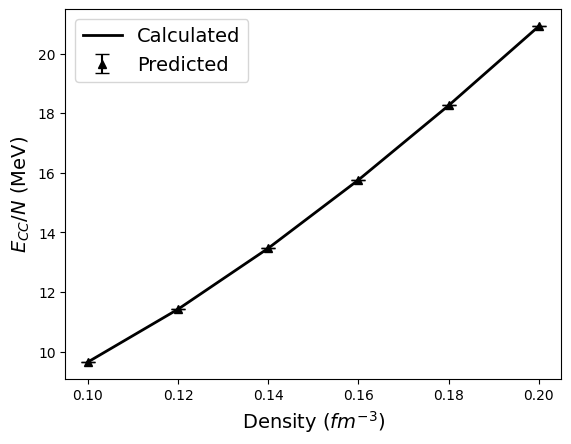

In [10]:
# Define the densities
densities = [0.10, 0.12, 0.14, 0.16, 0.18, 0.20] 

# Get the Hartree-Fock reference energies and CCD(T) correlations energies
refs_ccdt_pert_pnm = [ccdt_pert_pnm_data[0][:,-4][-1], ccdt_pert_pnm_data[1][:,-4][-1], ccdt_pert_pnm_data[2][:,-4][-1], ccdt_pert_pnm_data[3][:,-4][-1], ccdt_pert_pnm_data[4][:,-4][-1], ccdt_pert_pnm_data[5][:,-4][-1]]
cc_ccdt_pert_pnm = [ccdt_pert_pnm_data[0][:,-2][-1], ccdt_pert_pnm_data[1][:,-2][-1], ccdt_pert_pnm_data[2][:,-2][-1], ccdt_pert_pnm_data[3][:,-2][-1], ccdt_pert_pnm_data[4][:,-2][-1], ccdt_pert_pnm_data[5][:,-2][-1]]

# Plot the converged and predicted energy per particle for pure neutron matter
plt.plot(densities, cc_ccdt_pert_pnm, color='black', linewidth=2, label="Calculated")
plt.errorbar(densities, refs_ccdt_pert_pnm+predictions_ccdt_pert_pnm/66, uncertainities_ccdt_pert_pnm/66, color='black', marker='^',capsize=5,label='Predicted', linestyle='none')
plt.xlabel(r'Density ($fm^{-3}$)', fontsize=14)
plt.ylabel(r"$E_{CC}/N$ (MeV)", fontsize=14)
plt.legend(fontsize=14)
plt.savefig(images_dir+"prx_figure_2_a.png",dpi=1000)


### Right (SNM)

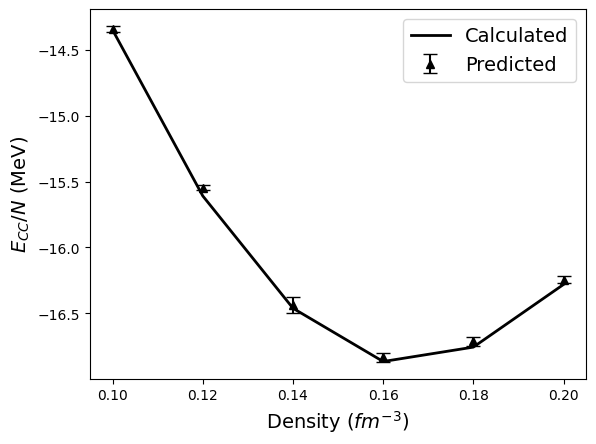

In [11]:
# Get the Hartree-Fock reference energies and CCD(T) correlations energies
refs_ccdt_pert_snm = [ccdt_pert_snm_data[0][:,-4][-1], ccdt_pert_snm_data[1][:,-4][-1], ccdt_pert_snm_data[2][:,-4][-1], ccdt_pert_snm_data[3][:,-4][-1], ccdt_pert_snm_data[4][:,-4][-1], ccdt_pert_snm_data[5][:,-4][-1]]
cc_ccdt_pert_snm = [ccdt_pert_snm_data[0][:,-2][-1], ccdt_pert_snm_data[1][:,-2][-1], ccdt_pert_snm_data[2][:,-2][-1], ccdt_pert_snm_data[3][:,-2][-1], ccdt_pert_snm_data[4][:,-2][-1], ccdt_pert_snm_data[5][:,-2][-1]]

# Plot the converged and predicted energy per particle for symmetric nuclear matter
plt.plot(densities, cc_ccdt_pert_snm, color='black', linewidth=2, label="Calculated")
plt.errorbar(densities, refs_ccdt_pert_snm+predictions_ccdt_pert_snm/132, uncertainities_ccdt_pert_snm/132, color='black', marker='^',capsize=5,label='Predicted', linestyle='none')
plt.xlabel(r'Density ($fm^{-3}$)', fontsize=14)
plt.ylabel(r"$E_{CC}/N$ (MeV)", fontsize=14)
plt.legend(fontsize=14)
plt.savefig(images_dir+"prx_figure_2_b.png",dpi=1000)



## Figure 3

In [13]:
# Calculate the symmetry energy using both the converged calculations and the SRE predictions
symmetry_energy_ccdt_pert_calculated = -calculated_ccdt_pert_snm/132 + calculated_ccdt_pert_pnm/66 + refs_ccdt_pert_pnm - refs_ccdt_pert_snm
symmetry_energy_ccdt_pert_predicted = -predictions_ccdt_pert_snm/132 + predictions_ccdt_pert_pnm/66 + refs_ccdt_pert_pnm - refs_ccdt_pert_snm

# Calculate the uncertainty on the symmetry energy from the SRE predictures
symmetry_energy_ccdt_pert_errors = subtraction_error (uncertainities_ccdt_pert_pnm/66, uncertainities_ccdt_pert_snm/132)


0.08348418279712408
0.03242051035499977


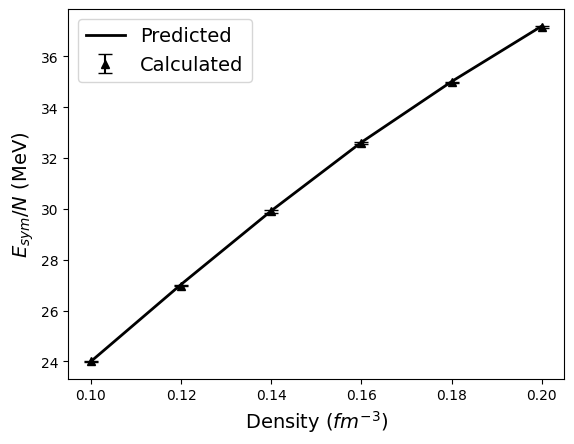

In [14]:
# Plot the converged and predicted symmetry energies
plt.plot(densities, symmetry_energy_ccdt_pert_calculated, linewidth=2,color="black",label="Predicted")
plt.errorbar(densities, symmetry_energy_ccdt_pert_predicted, symmetry_energy_ccdt_pert_errors, linestyle='none', marker='^', capsize=5,color='black', label='Calculated')
plt.xlabel(r"Density ($fm^{-3}$)", fontsize=14)
plt.ylabel(r"$E_{sym}/N$ (MeV)", fontsize=14)
plt.legend(fontsize=14)
plt.savefig(images_dir+"prx_figure_3.png",dpi=1000)
print(percent_error(symmetry_energy_ccdt_pert_calculated, symmetry_energy_ccdt_pert_predicted))
print(np.average(symmetry_energy_ccdt_pert_errors))